Importing the dependencies

In [118]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

Data Collection and Analysis

In [119]:
df=pd.read_csv("diabetes.csv")

In [120]:
columns_in_df=df.columns
columns_in_df

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [121]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
df.shape

(768, 9)

1 -> person having Diabetes

0 -> person not having Diabetes

In [123]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [125]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [126]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Correlation Matrix

In [127]:
correlate=df.corr()

<Axes: >

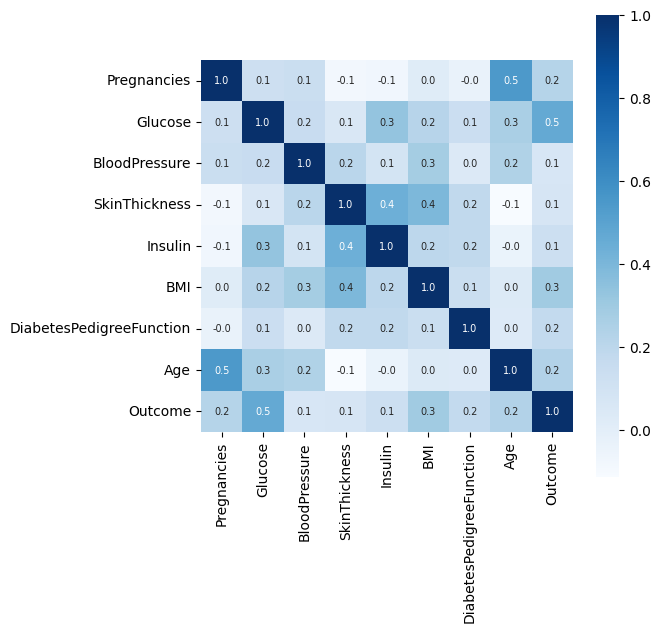

In [128]:
plt.figure(figsize=(6,6))
sns.heatmap(correlate,annot=True,fmt=".1f",square=True,annot_kws=({'size':7}),cmap="Blues")

In [129]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [130]:
columns_in_x=x.columns

<ipython-input-131-b51f5bf898a7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[i])
<ipython-input-131-b51f5bf898a7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[i])
<ipython-input-131-b51f5bf898a7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

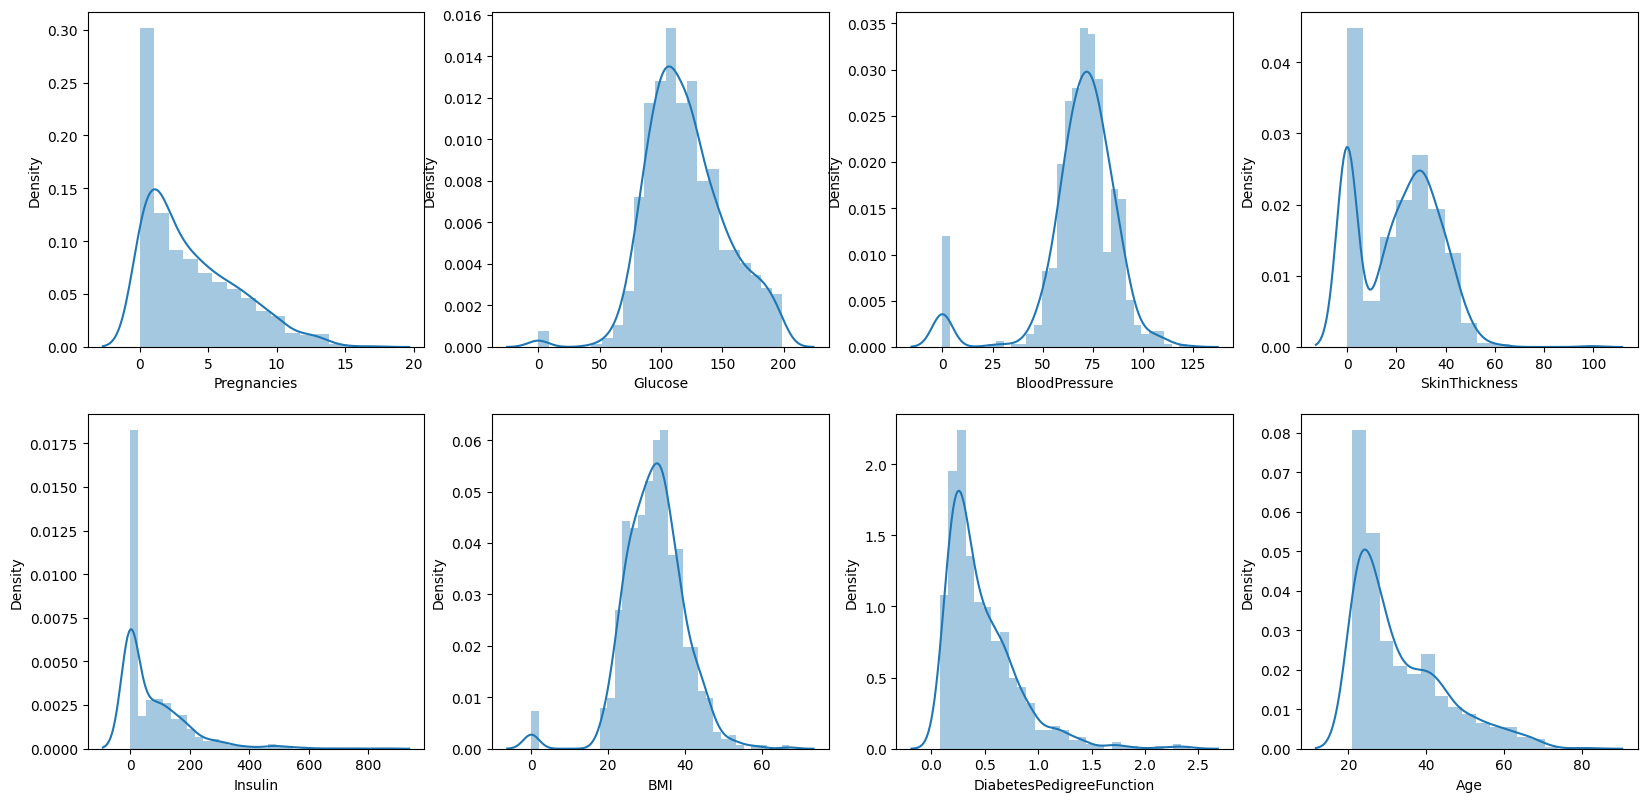

In [131]:
plt.figure(figsize=(20,20))
a=1
for i in columns_in_x:
    plt.subplot(4,4,a)
    sns.distplot(x[i])
    a=a+1

Applying Transfoemers

For Right-Skewed Curves

In [132]:
columns_in_x

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

<ipython-input-133-49befa7fb28a>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[i])
<ipython-input-133-49befa7fb28a>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[i])
<ipython-input-133-49befa7fb28a>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

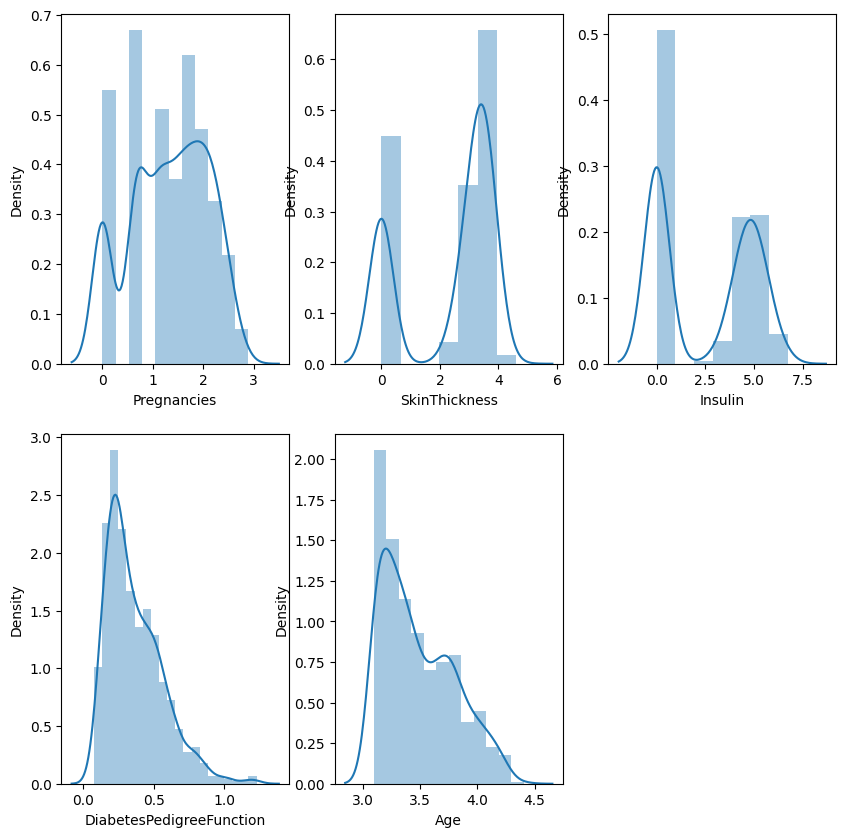

In [133]:
Right_skewed=['Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']

transformer=FunctionTransformer(func=np.log1p)

b=1

plt.figure(figsize=(10,10))

for i in Right_skewed:

    x[i]=transformer.fit_transform(x[i])

    plt.subplot(2,3,b)

    sns.distplot(x[i])

    b=b+1

Identifying outlayers in the data

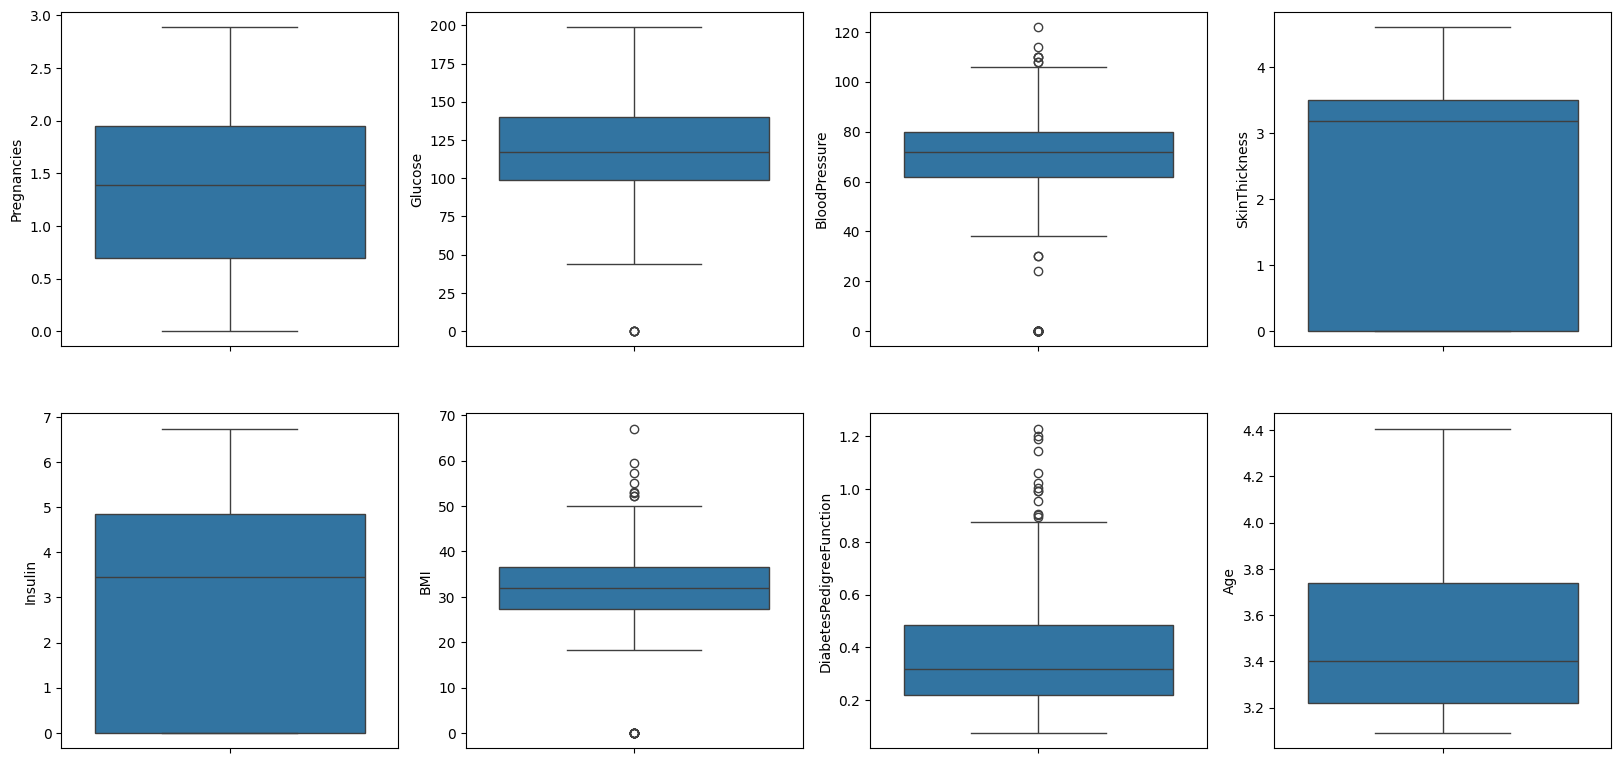

In [134]:
plt.figure(figsize=(20,20))
a=1

for i in columns_in_x:
    plt.subplot(4,4,a)

    sns.boxplot(data=x,y=i)

    a=a+1

Outlayers Removal

In [135]:
outlayer_columns = ['Glucose', 'BloodPressure','BMI', 'DiabetesPedigreeFunction']
for i in outlayer_columns:
        Q1 = x[i].quantile(0.25)
        Q3 = x[i].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        x = x[(x[i] >= lower_bound) & (x[i] <= upper_bound)]


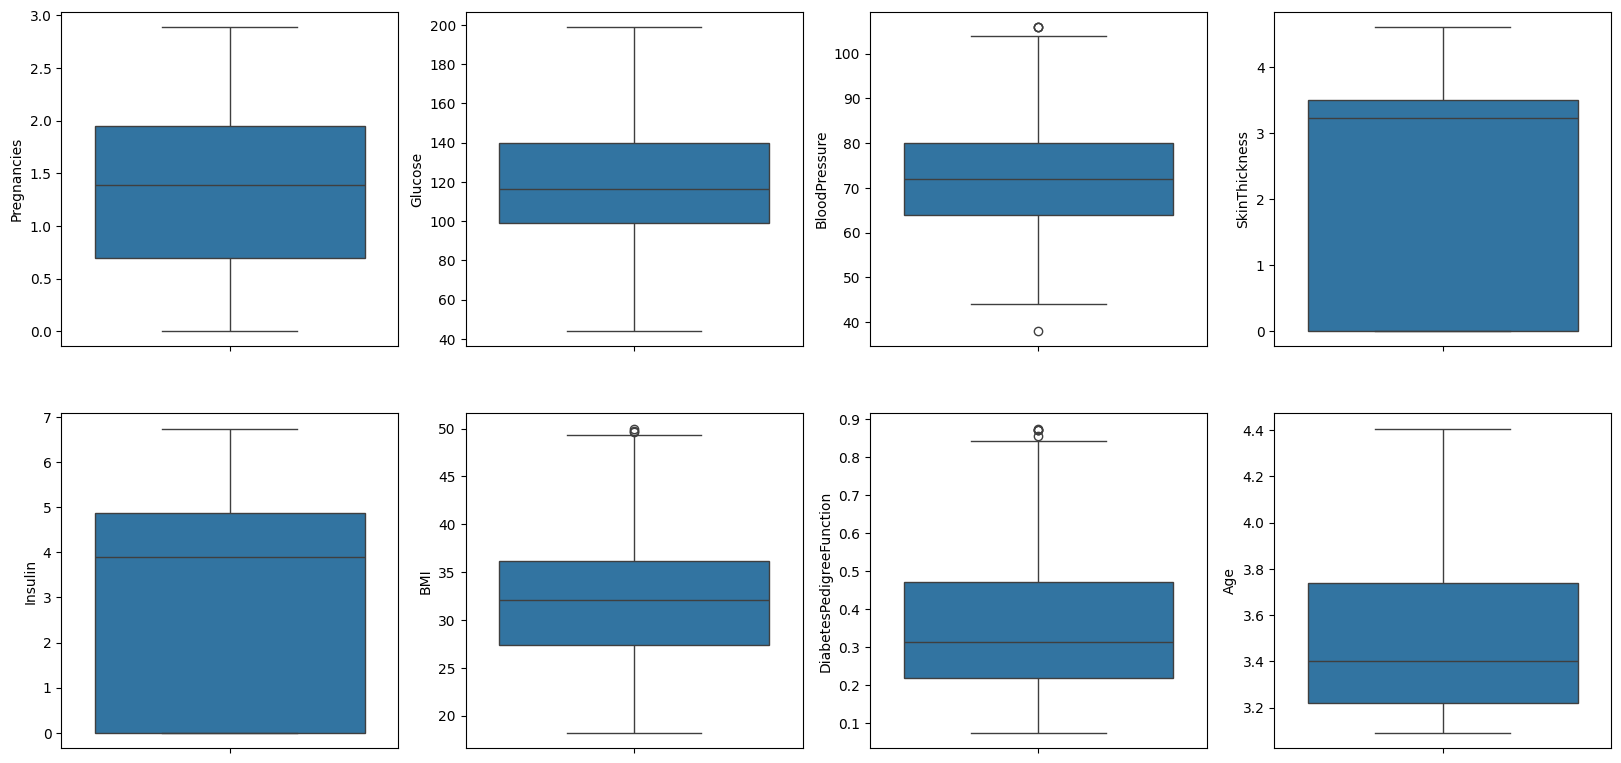

In [136]:
plt.figure(figsize=(20,20))
a=1

for i in columns_in_x:

    plt.subplot(4,4,a)

    sns.boxplot(data=x,y=i)

    a=a+1

In [137]:
x=df.drop(columns=['Outcome','Age'],axis=1)
y=df['Outcome']

Splitting the data into training set and testing set

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [139]:
model=SVC()
model.fit(x_train,y_train)
x_test_predicted=model.predict(x_test)
accuracy_score(x_test_predicted,y_test)

0.7597402597402597

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
x_test_predicted=model.predict(x_test)
accuracy_score(x_test_predicted,y_test)

0.7337662337662337

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [143]:
model=LogisticRegression()
model.fit(x_train,y_train)
x_test_predicted=model.predict(x_test)
accuracy_score(x_test_predicted,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8051948051948052

In [144]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
x_test_predicted=model.predict(x_test)
accuracy_score(x_test_predicted,y_test)

0.7402597402597403

In [145]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
x_test_predicted=model.predict(x_test)
accuracy_score(x_test_predicted,y_test)

0.7727272727272727

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
model=LogisticRegression()
parameter={'C':[0.01,0.1,1,10,100]}
m=GridSearchCV(model,parameter,cv=5)
m.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [149]:
m.best_params_

{'C': 100}

In [150]:
model=LogisticRegression(C=100)
model.fit(x_train,y_train)
x_test_predicted=model.predict(x_test)
accuracy_score(x_test_predicted,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8116883116883117

Hyper-parameter tuning

In [151]:
from sklearn.model_selection import RandomizedSearchCV

In [152]:
model=SVC()
parameter={'C':[0.1,1,10],
           'kernel':['linear','rbf']}
m=GridSearchCV(model,parameter,cv=5)
m.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [153]:
m.best_params_

{'C': 10, 'kernel': 'linear'}

In [ ]:
model=SVC(kernel='linear',C=1)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_train_predicted=model.predict(x_train)
y_test_predicted=model.predict(x_test)

In [ ]:
train_accuracy=accuracy_score(y_train_predicted,y_train)
test_accuracy=accuracy_score(y_test_predicted,y_test)

In [ ]:
print(f"Training accuracy is {train_accuracy}")

In [ ]:
print(f"Testing accuracy is {test_accuracy}")

Bulding a predictive system


In [ ]:
import warnings

# Suppress specific warning
warnings.filterwarnings('ignore',category=UserWarning)


# user input data
input_data=[10,168,74,0,0,38,0.537,34]

# converting the input list to numpy array
input_data=np.asarray(input_data)

#reshaping the array as the model takes only 2D input
input_data_reshaped=input_data.reshape(1,-1)

#predicting the model
predict=model.predict(input_data_reshaped)

if predict[0]==0:
  print("The person is not Diabetic")
else:
  print("The person is Diabetic")

In [ ]:
import pickle

In [ ]:
file_name="diabetes_model.sav"
pickle.dump(model,open(file_name,"wb"))

In [ ]:
loaded=pickle.load(open(file_name,"rb"))
loaded

In [ ]:
for column in x.columns:
  print(column)